## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how='left')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice= combined_data['Mouse ID'].unique()
number_mice= len(number_mice)
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data= combined_data.loc[combined_data['Mouse ID']=="g989"]
all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_id)==False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean= clean_data['Mouse ID'].unique()
number_mice_clean= len(number_mice_clean)
number_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median= clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance= clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_dev= clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM= clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table= pd.DataFrame({"mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": standard_dev,
                            "SEM": SEM})
summary_table
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_agg= clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
summary_table_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

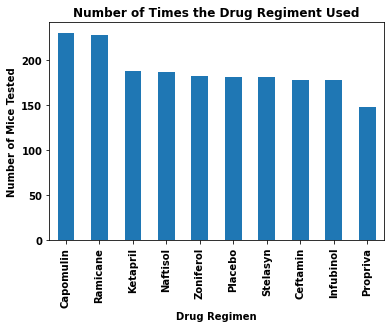

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
number_times_used= clean_data["Drug Regimen"].value_counts()
number_times_used.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Times the Drug Regiment Used")
plt.show()

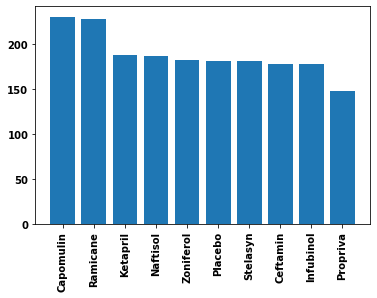

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x= number_times_used.index.values
y= number_times_used.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_data.groupby("Mouse ID").max()["Timepoint"]
max_tumor = max_tumor.reset_index()
max_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data, on= ["Mouse ID", "Timepoint"], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
drug_list= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume= merged_data.loc[merged_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    drug_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    #print(f"Values above {upper_bound} could be outliers.") 
    outlier= tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug} outlier: {outlier}")

Capomulin outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


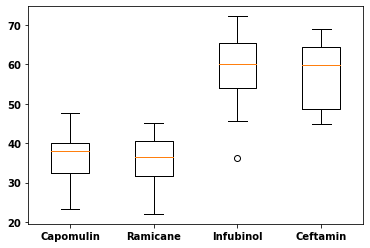

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_list, labels= treatments)
plt.show()

## Line and Scatter Plots

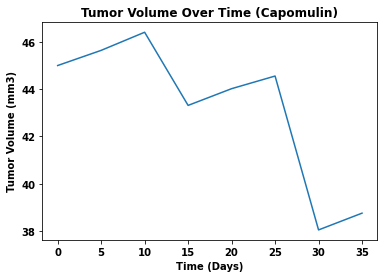

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Focus on the Copomulin Drug Regimen
capomulin_df = combined_data.loc[(combined_data["Drug Regimen"]== "Capomulin"), :]
# capomulin_df
# Select a mouse (j246) from the data set to compare
cap_mice= capomulin_df.loc[capomulin_df["Mouse ID"]=="j246"]
# cap_mice
timer_series = cap_mice["Timepoint"]
plt.plot(timer_series, cap_mice["Tumor Volume (mm3)"])
plt.title ("Tumor Volume Over Time (Capomulin)")
plt.xlabel ("Time (Days)")
plt.ylabel ("Tumor Volume (mm3)")
plt.show()


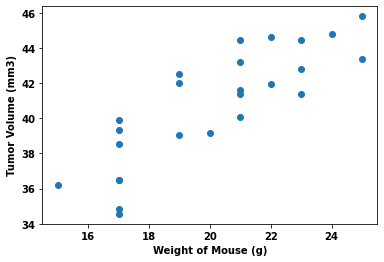

In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Graphing the average mouse weight(x) and tumore volume (mm3) (y)
mouse_weight= capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
# mouse_weight
tumor_volume= capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
# tumor_volume

# Scatter plot
plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

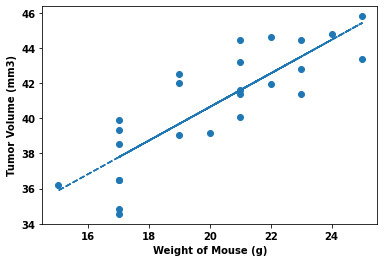

 The correlation between mouse weight and tumor volume is (0.8419363424694717, 1.322572243471279e-07)


In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight= capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume= capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)

fit = slope * mouse_weight + int

# Plot
plt.scatter(mouse_weight, tumor_volume)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_weight, fit, "--")
plt.show()

# Correlation Coefficient
corr = st.pearsonr(mouse_weight, tumor_volume)
print(f" The correlation between mouse weight and tumor volume is {corr}")